In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sklearn as sk


In [ ]:
df= pd.read_csv('/content/train.csv')

In [ ]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
326,327,0,3,"Nysveen, Mr. Johan Hansen",male,61.0,0,0,345364,6.2375,NaN,S
175,176,0,3,"Klasen, Mr. Klas Albin",male,18.0,1,1,350404,7.8542,NaN,S
95,96,0,3,"Shorney, Mr. Charles Joseph",male,NaN,0,0,374910,8.0500,NaN,S
867,868,0,1,"Roebling, Mr. Washington Augustus II",male,31.0,0,0,PC 17590,50.4958,A24,S
810,811,0,3,"Alexander, Mr. William",male,26.0,0,0,3474,7.8875,NaN,S


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


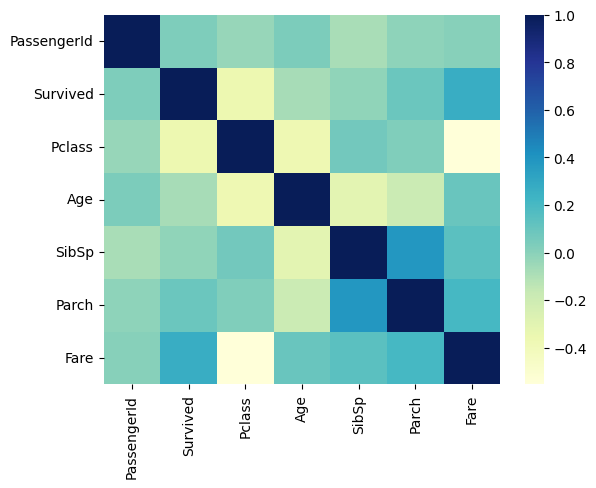

In [ ]:
sns.heatmap(df.corr(),cmap='YlGnBu')

plt.show()

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2)

for train_indices, test_indices in split.split(df, df[['Survived','Pclass','Sex']]):
    strat_train_set = df.loc[train_indices]
    strat_test_set = df.loc[test_indices]

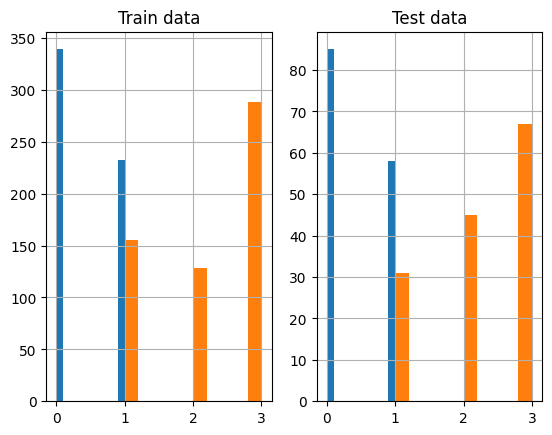

In [ ]:
plt.subplot(1,2,1)
strat_train_set['Survived'].hist()
strat_train_set['Pclass'].hist()
plt.title("Train data")

plt.subplot(1,2,2)
strat_test_set['Survived'].hist()
strat_test_set['Pclass'].hist()
plt.title("Test data")
plt.show()

strat_train_set.info()

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer

class AgeImputer(BaseEstimator, TransformerMixin):
  def fit(self,X,y=None):
    return self

  def transform(self,X):
    imputer=SimpleImputer(strategy='mean')
    X['Age']=imputer.fit_transform(X[['Age']])
    return X

In [ ]:
# from sklearn.preprocessing import OneHotEncoder
# class FeatureEncoder(BaseEstimator,TransformerMixin):
#   def fit(self,X,y=None):
#     return self

#   def transform(self, X):
#     encoder = OneHotEncoder()
#     matrix=encoder.fit_transform(X[['Embarked']]).toarray()

#     column_names=['C','S','Q','N']

#     for i in range(len(matrix.T)):
#         X[column_names[i]]=matrix.T[i]
#     matrix = encoder.fit_transform(X[['Sex']]).toarray()

#     column_names=['Female','Male']

#     for i in range(len(matrix.T)):
#         X[column_names[i]]=matrix.T[i]
#     return X

In [ ]:
class FeatureDropper(BaseEstimator,TransformerMixin):
  def fit(self,x,y=None):
    return self
  def transform(self,X):
    return X.drop(['Name','Ticket','Cabin','Sex','N'],axis=1,errors='ignore')

In [ ]:
from sklearn.pipeline import Pipeline


# Reorder the pipeline steps
pipeline=Pipeline([('ageimputer',AgeImputer()),
                  ('featuredropper',FeatureDropper())]) # FeatureDropper is now last

In [ ]:
strat_train_set=pipeline.fit_transform(strat_train_set)


In [ ]:
strat_train_set

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
138,173,1,3,1.0,1,1,11.1333
87,113,0,3,22.0,0,0,8.0500
382,480,1,3,2.0,0,1,12.2875
244,308,1,1,17.0,1,0,108.9000
342,428,1,2,19.0,0,0,26.0000
...,...,...,...,...,...,...,...
208,259,1,1,35.0,0,0,512.3292
576,725,1,1,27.0,1,0,53.1000
345,433,1,2,42.0,1,0,26.0000
699,875,1,2,28.0,1,0,24.0000


In [ ]:

strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 571 entries, 138 to 696
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  571 non-null    int64  
 1   Survived     571 non-null    int64  
 2   Pclass       571 non-null    int64  
 3   Age          571 non-null    float64
 4   SibSp        571 non-null    int64  
 5   Parch        571 non-null    int64  
 6   Fare         571 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 35.7 KB


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

X= strat_train_set.drop('Survived',axis=1)
y=strat_train_set['Survived']

scaler=StandardScaler()

X_data=scaler.fit_transform(X)
y_data=y.to_numpy()

In [ ]:
X_data

array([[-1.05267444,  0.90301793, -1.96911022,  0.4933752 ,  0.70634701,
        -0.45412245],
       [-1.28322688,  0.90301793, -0.53897867, -0.54617181, -0.49402246,
        -0.51353286],
       [ 0.12698554,  0.90301793, -1.90100872, -0.54617181,  0.70634701,
        -0.43188281],
       ...,
       [-0.05361387, -0.27420407,  0.82305138,  0.4933752 , -0.49402246,
        -0.16766419],
       [ 1.64478909, -0.27420407, -0.13036965,  0.4933752 , -0.49402246,
        -0.20620109],
       [ 1.63326147, -1.45142607,  1.1635589 ,  0.4933752 ,  0.70634701,
         0.34399408]])

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
clf= RandomForestClassifier()
param_grid=[
    {'n_estimators':[10,100,200,500], 'max_depth':[None,5,10],'min_samples_split':[2,3,4]
}]
grid_search=GridSearchCV(clf,param_grid,cv=3,scoring='accuracy',return_train_score=True)
grid_search.fit(X_data,y_data)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 200, 500]}],
             return_train_score=True, scoring='accuracy')

In [ ]:
final_clf=grid_search.best_estimator_

In [ ]:
final_clf

RandomForestClassifier(max_depth=5, min_samples_split=4)

In [ ]:
strat_test_set=pipeline.fit_transform(strat_test_set)

In [ ]:
X_test=strat_test_set.drop('Survived',axis=1)
y_test=strat_test_set['Survived']

scaler=StandardScaler()
X_data_test= scaler.fit_transform(X_test)
y_data_test=y_test.to_numpy()

In [ ]:
final_clf.score(X_data_test,y_data_test)

0.7762237762237763

In [ ]:
final_data=pipeline.fit_transform(df)

In [ ]:
final_data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
709,886,0,3,39.0,0,5,29.1250
710,887,0,2,27.0,0,0,13.0000
711,888,1,1,19.0,0,0,30.0000
712,890,1,1,26.0,0,0,30.0000


In [ ]:
X_final=final_data.drop('Survived',axis=1)
y_final=final_data['Survived']

scaler=StandardScaler()
X_data_final =scaler.fit_transform(X_final)
y_data_final= y_final.to_numpy()


In [ ]:
prod_clf= RandomForestClassifier()
param_grid=[
    {'n_estimators':[10,100,200,500], 'max_depth':[None,5,10],'min_samples_split':[2,3,4]
}]
grid_search=GridSearchCV(prod_clf,param_grid,cv=3,scoring='accuracy',return_train_score=True)
grid_search.fit(X_data_final,y_data_final)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 200, 500]}],
             return_train_score=True, scoring='accuracy')

In [ ]:
prod_final_clf=grid_search.best_estimator_

In [ ]:
prod_final_clf

RandomForestClassifier(max_depth=5, n_estimators=500)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X_test = strat_test_set.drop("Survived", axis=1)
y_test = strat_test_set["Survived"]

In [ ]:
X_test_scaled = scaler.transform(X_test)

In [ ]:
y_pred = prod_final_clf.predict(X_test_scaled)

In [ ]:
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Test Accuracy: 0.8111888111888111
Confusion Matrix:
 [[78  7]
 [20 38]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.92      0.85        85
           1       0.84      0.66      0.74        58

    accuracy                           0.81       143
   macro avg       0.82      0.79      0.80       143
weighted avg       0.82      0.81      0.81       143

